In [1]:
import os
import numpy as np
os.environ['NOTEBOOK_MODE'] = '1'
from robustness.tools.vis_tools import show_image_row

from utils import *
from viz_utils import *
from inspection_utils import *

from dataset_paths import IMAGENET_PATH, SALIENT_IMAGENET_PATH

In [2]:
class_index = 309
feature_index = 1941
num_images = 65

************************************** Visualizing class: 309, feature: 1941 **************************************


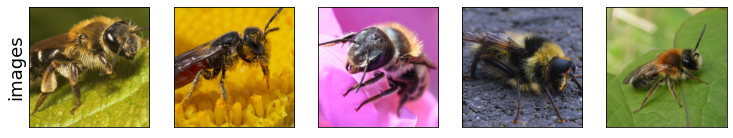

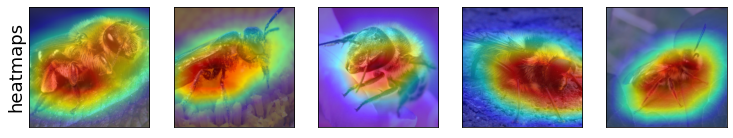

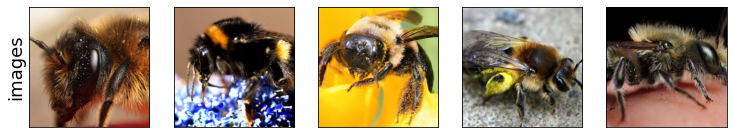

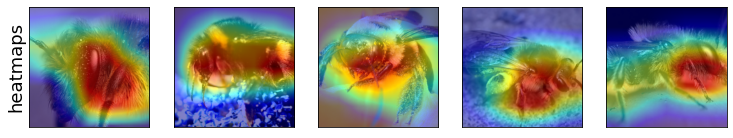

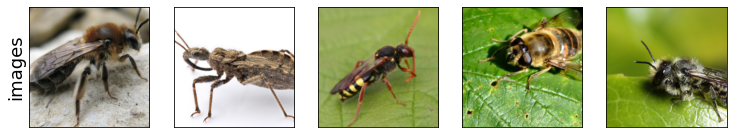

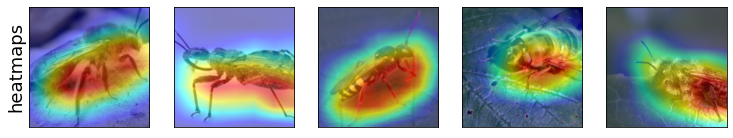

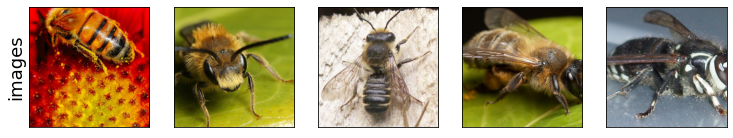

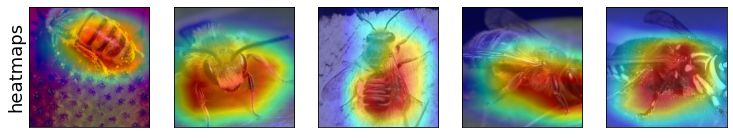

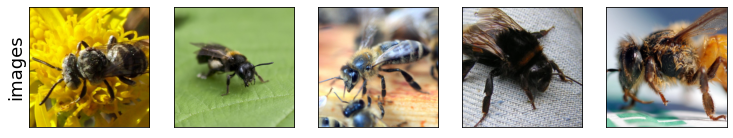

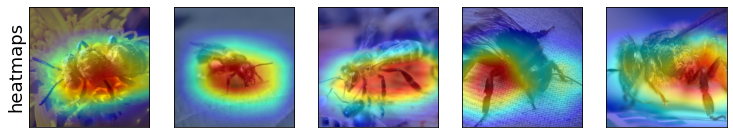

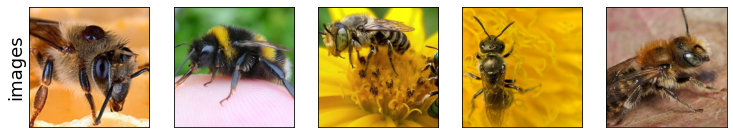

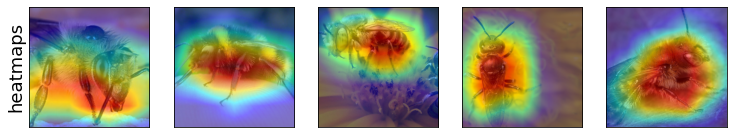

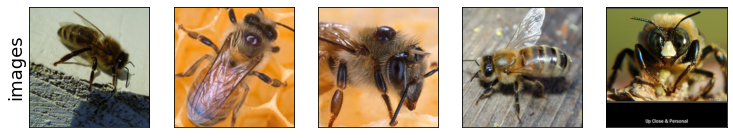

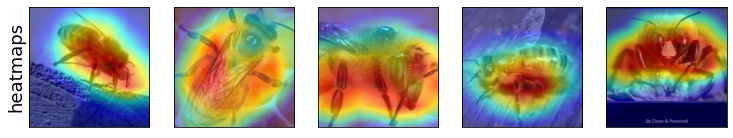

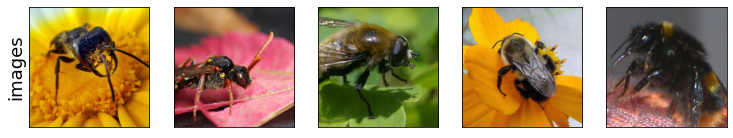

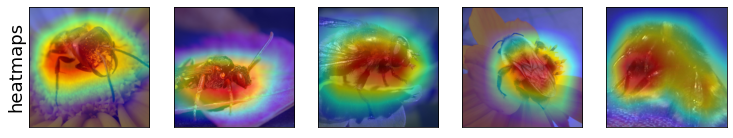

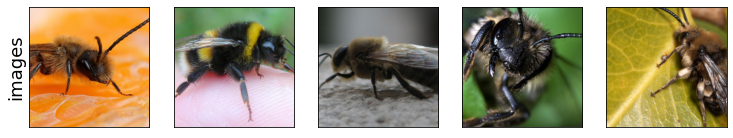

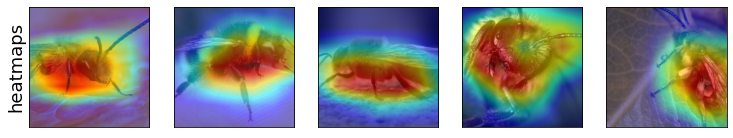

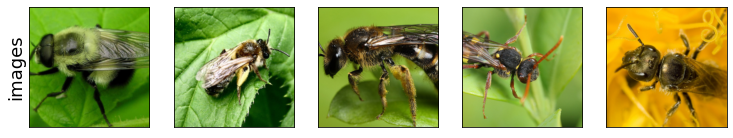

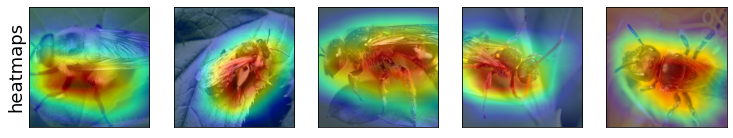

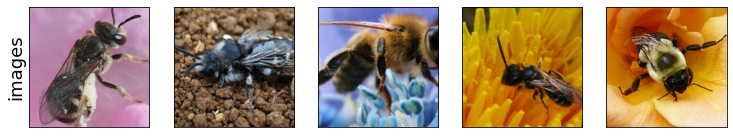

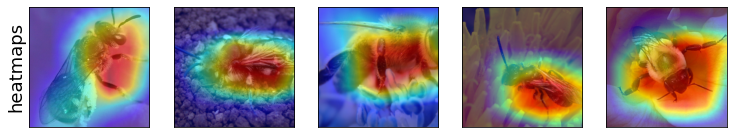

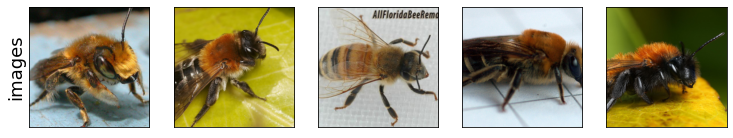

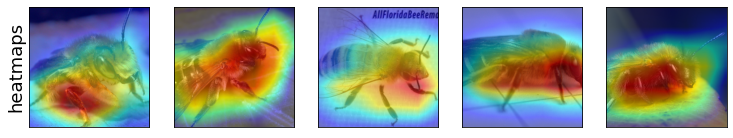

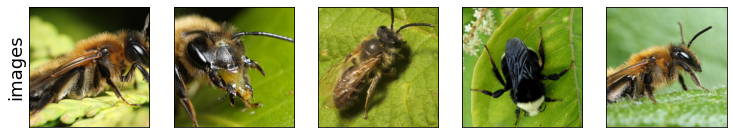

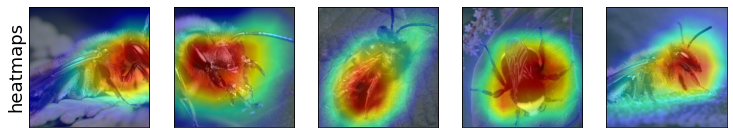

In [3]:
csv_path = 'mturk_results/discover_spurious_features.csv'
mturk_results_discover = MTurk_Results(csv_path)
class_to_features_dict = mturk_results_discover.class_to_features_dict
annotated_features = class_to_features_dict[class_index]
if feature_index not in annotated_features:
    raise ValueError('feature_index not present, choose one from : {:s}'.format(str(annotated_features)))

salient_imagenet = SalientImageNet(IMAGENET_PATH, SALIENT_IMAGENET_PATH, class_index, [feature_index])
dataloader = DataLoader(salient_imagenet, batch_size=num_images, shuffle=False)

print_with_stars(' Visualizing class: {:d}, feature: {:d} '.format(class_index, feature_index))
ims, masks = next(iter(dataloader))

for start in range(0, len(ims), 5):
    curr_images = ims[start: start + 5]
    curr_masks = 1. - masks[start: start + 5, 0, :, :]
    curr_heatmaps = compute_heatmaps(curr_images.permute(0, 2, 3, 1), curr_masks)
    
    show_image_row([curr_images], ['images'], tlist=[], fontsize=18)
    show_image_row([curr_heatmaps], ['heatmaps'], tlist=[], fontsize=18)